In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/creditcard/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
sum(df['V1'])/len(df['V1'])

3.918648695036257e-15

In [10]:
# for column in df.columns:
#   for i in range(len(df[column])):
#     if(df[column][i]=='NaN'):
#       if(column=='Class'):
#         df[column][i]=0.0
#       else:
#         df[column][i]=sum(df[column])/len(df[column])

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
for column in df.columns:
  if(column == 'Class'):
    df[column].fillna(value=0.0 , inplace=True)
  else:
    df[column].fillna(value=df[column].mean() , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


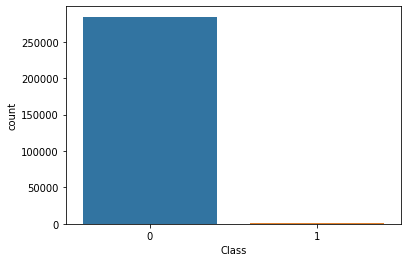

In [13]:
sns.countplot(df['Class'])

In [14]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

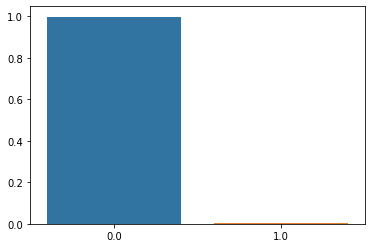

In [15]:
sns.barplot(x=['0.0','1.0'],y=[df['Class'].value_counts()[0]/df['Class'].count(),df['Class'].value_counts()[1]/df['Class'].count()])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


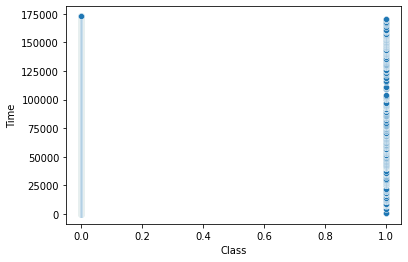

In [16]:
sns.scatterplot(df['Class'],df['Time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


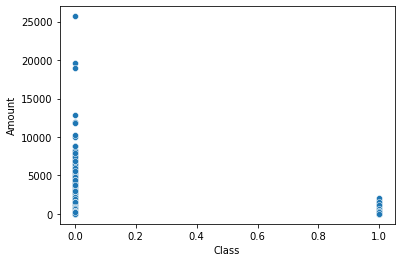

In [17]:
sns.scatterplot(df['Class'],df['Amount'],)

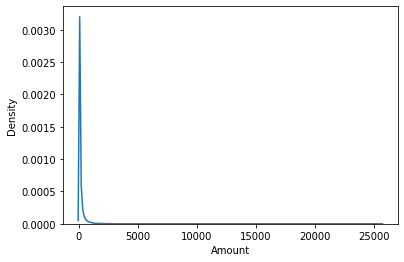

In [18]:
sns.kdeplot(df['Amount'])

In [19]:
df['Amount'].min()

0.0

In [20]:
df['Amount'].max()

25691.16

In [21]:
fraudulent=[]
non_fraudulent=[]

for i in range(len(df['Class'])):
  if(df['Class'][i]==1):
    fraudulent.append(df['Amount'][i])
  else:
    non_fraudulent.append(df['Amount'][i])


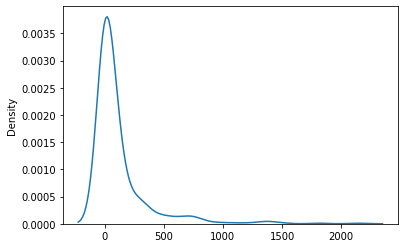

In [22]:
sns.kdeplot(fraudulent)

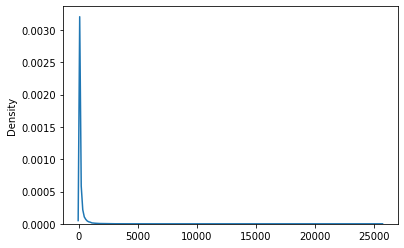

In [23]:
sns.kdeplot(non_fraudulent)

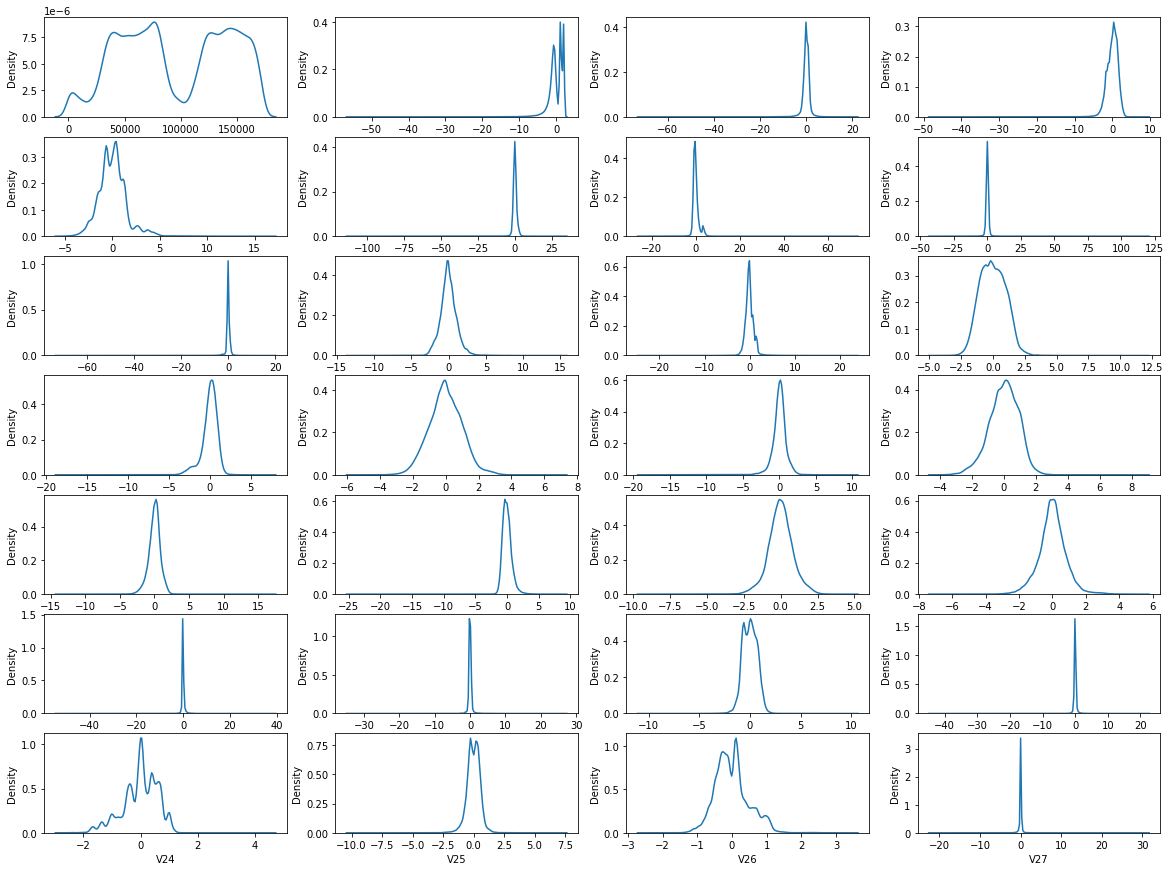

In [59]:
fig, axes = plt.subplots(7, 4,figsize=(20,15))
col=df.columns[1:-2]
k=0
for j in range(7):
  for i in range(4):
    sns.kdeplot(data=df, x=df.columns[k], ax=axes[j,i])
    k=k+1

In [25]:
# x= df.drop(['Class','Time'],axis=1)
# y= df['Class']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount = np.array(df['Amount']).reshape(-1,1)
df['Amount'] = scaler.fit_transform(amount)

In [25]:
X= df.drop(['Class','Time'],axis=1)
y= df['Class']

In [26]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

In [27]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [28]:
from scipy import stats

In [29]:
col = []
for i in X.columns:
    if (X.skew()[i] > 1) or (X.skew()[i] < -1):
        col.append(i)

for i in col:
    X[i]=np.cbrt(X[i])

In [30]:
X.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [31]:
X.skew()

V1       -0.110356
V2       -0.164007
V3       -0.230100
V4        0.676292
V5        0.103524
V6        0.572514
V7       -0.089716
V8       -0.213389
V9        0.554680
V10       0.279218
V11       0.356506
V12      -0.361943
V13       0.065233
V14      -0.147514
V15      -0.308423
V16      -0.160250
V17       0.182171
V18      -0.259880
V19       0.109192
V20       0.429434
V21       0.193279
V22      -0.213258
V23       0.090918
V24      -0.552499
V25      -0.415793
V26       0.576693
V27      -0.081594
V28      -0.256158
Amount    1.603881
dtype: float64

In [37]:
def Classifier_model(x_data,y_data):
  # X= df.drop(['Class','Time'],axis=1)
  # y= df['Class']

  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3,random_state=42)

  logistic_reg = LogisticRegression()
  naive_bayes = GaussianNB()
  svm=SVC()
  xg=XGBClassifier()
  dtree= DecisionTreeClassifier()
  
  list = [logistic_reg,naive_bayes,svm,xg,dtree]
  score = []
  for i in list:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print('\n')
    print(f'for {i} accuracy : {round(i.score(x_test, y_test)*100,2)} %')
    score.append(i.score(x_test, y_test))
    print(f'for {i}')    
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print('\n')

    accuracy.append(accuracy_score(y_test,pred))
    precision.append(precision_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    f1.append(f1_score(y_test,pred))

  return accuracy,precision,recall,f1

In [38]:
acc1,pre1,re1,F1_1=Classifier_model(X,y)



for LogisticRegression() accuracy : 99.94 %
for LogisticRegression()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.75      0.81       136

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443

[[85292    15]
 [   34   102]]




for GaussianNB() accuracy : 99.72 %
for GaussianNB()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.84      0.49       136

    accuracy                           1.00     85443
   macro avg       0.67      0.92      0.74     85443
weighted avg       1.00      1.00      1.00     85443

[[85088   219]
 [   22   114]]




for SVC() accuracy : 99.95 %
for SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
    

In [39]:
without_smote=pd.DataFrame()
without_smote['Model']=['logistic_reg','naive_bayes','svm','xg','dtree']
without_smote['Accuracy']=acc1
without_smote['precision']=pre1
without_smote['Recall']=re1
without_smote['F1_score']=F1_1

In [40]:
without_smote

,Model,Accuracy,precision,Recall,F1_score
0,logistic_reg,0.999427,0.871795,0.750000,0.806324
1,naive_bayes,0.997179,0.342342,0.838235,0.486141
2,svm,0.999473,0.858268,0.801471,0.828897
3,xg,0.999625,0.940678,0.816176,0.874016
4,dtree,0.999263,0.748299,0.808824,0.777385


In [41]:
def Classifier_model_with_smote(x_data,y_data):
  # X= df.drop(['Class','Time'],axis=1)
  # y= df['Class']
  accuracy=[]
  precision=[]
  recall=[]
  f1=[]

  smote = SMOTE(sampling_strategy='minority')
  x_sm, y_sm = smote.fit_resample(x_data, y_data)

  x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3,random_state=42)

  logistic_reg = LogisticRegression()
  naive_bayes = GaussianNB()
  svm=SVC()
  xg=XGBClassifier()
  dtree= DecisionTreeClassifier()
  
  list = [logistic_reg,naive_bayes,svm,xg,dtree]
  score = []
  for i in list:
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print('\n')
    print(f'for {i} accuracy : {round(i.score(x_test, y_test)*100,2)} %')
    score.append(i.score(x_test, y_test))
    print(f'for {i}')    
    print(classification_report(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print('\n')

    accuracy.append(accuracy_score(y_test,pred))
    precision.append(precision_score(y_test,pred))
    recall.append(recall_score(y_test,pred))
    f1.append(f1_score(y_test,pred))

  return accuracy,precision,recall,f1

In [42]:
acc2,pre2,re2,F1_2=Classifier_model_with_smote(X,y)



for LogisticRegression() accuracy : 94.87 %
for LogisticRegression()
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     85149
           1       0.97      0.93      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

[[82445  2704]
 [ 6047 79393]]




for GaussianNB() accuracy : 91.0 %
for GaussianNB()
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     85149
           1       1.00      0.82      0.90     85440

    accuracy                           0.91    170589
   macro avg       0.92      0.91      0.91    170589
weighted avg       0.92      0.91      0.91    170589

[[84880   269]
 [15090 70350]]




for SVC() accuracy : 99.65 %
for SVC()
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85149
     

In [43]:
smote=pd.DataFrame()
smote['Model']=['logistic_reg','naive_bayes','svm','xg','dtree']
smote['Accuracy']=acc2
smote['precision']=pre2
smote['Recall']=re2
smote['F1_score']=F1_2

In [44]:
smote

,Model,Accuracy,precision,Recall,F1_score
0,logistic_reg,0.948701,0.967063,0.929225,0.947767
1,naive_bayes,0.909965,0.996191,0.823385,0.901582
2,svm,0.996483,0.994786,0.998209,0.996495
3,xg,0.982736,0.989951,0.975433,0.982638
4,dtree,0.998183,0.997290,0.999087,0.998187


In [45]:
import tensorflow as tf 
from tensorflow import keras 

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.layers import Dropout

from tensorflow.keras.callbacks import EarlyStopping

from keras import metrics

In [46]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(X, y)

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.3,random_state=42)

#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [47]:
X.shape[1]

29

In [48]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3840      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 78,081
Trainable params: 78,081
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)#,callbacks = es

Epoch 1/50
9951/9951 [==============================] - 34s 3ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0069 - val_accuracy: 0.9983
Epoch 2/50
9951/9951 [==============================] - 33s 3ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 3/50
9951/9951 [==============================] - 31s 3ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9995
Epoch 4/50
9951/9951 [==============================] - 31s 3ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 5/50
9951/9951 [==============================] - 31s 3ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0023 - val_accuracy: 0.9995
Epoch 6/50
9951/9951 [==============================] - 34s 3ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0089 - val_accuracy: 0.9986
Epoch 7/50
9951/9951 [==============================] - 33s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0037 - val_ac

In [51]:
model.evaluate(x_test, y_test)

5331/5331 [==============================] - 8s 2ms/step - loss: 0.0044 - accuracy: 0.9997


[0.004411532077938318, 0.9996951818466187]

In [53]:
prediction = model.predict(x_test)

In [54]:
prediction

array([[1.       ],
       [0.9997047],
       [0.       ],
       ...,
       [0.9997047],
       [1.       ],
       [0.9997047]], dtype=float32)

In [55]:
prediction = prediction[:, 0]

In [56]:
for i in range(len(prediction)):
  if prediction[i] >= 0.5 :
    prediction[i] = 1.0
  else:
    prediction[i] = 0.0

In [57]:
accuracy = accuracy_score(y_test,prediction)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test,prediction)
print('Precision: %f' % precision)

recall = recall_score(y_test,prediction)
print('Recall: %f' % recall)

f1 = f1_score(y_test,prediction)
print('F1 score: %f' % f1)

Accuracy: 0.999695
Precision: 0.999392
Recall: 1.000000
F1 score: 0.999696


In [58]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,prediction)
print(matrix)

[[85097    52]
 [    0 85440]]
